# Chirped Z-transform (CZT)

CZT allows, in a single step, to propagate to a near or far observation plane. IThe main advantage of CZT is that the region of interest and the sampling numbers can be arbitrarily chosen, endowing CZT with superior flexibility, and produces much faster results (acceleration > x100 with respect to RS algorithm) for focusing and far field diffraction patterns.

As the sampling area and pixels can be reduced to the desired observation area, the storage is also greatly reduced.

CZT algorithm allows to have a XY mask and compute in XY, Z, XZ, XYZ schemes, simply defining the output arrays.


## X Scheme

In [1]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_fields_Z import Scalar_field_Z


In [2]:
size = 250 * um
xin = np.linspace(-size, size, 4096)
wavelength = 550 * nm
z = 2 * mm


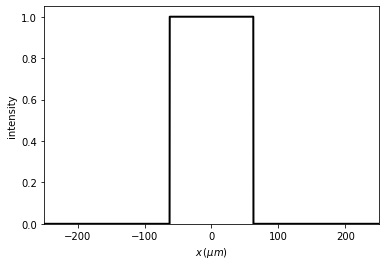

In [3]:
t0 = Scalar_mask_X(xin, wavelength)
t0.slit(x0=0, size=size / 2)
u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0
u1.draw()


### to just one data

In [4]:
xout = 0.
z = 2 * mm


In [5]:
%%time
u2 = u1.CZT(z, xout)
print(u2)


[0.04131865-0.87270006j]
CPU times: user 3.56 ms, sys: 0 ns, total: 3.56 ms
Wall time: 3 ms


### to field_z

In [6]:
xout = 0
z = np.linspace(.5 * mm, 10 * mm, 1024)


In [7]:
%%time
u2 = u1.CZT(z, xout, verbose=True)


CPU times: user 2.12 s, sys: 0 ns, total: 2.12 s
Wall time: 2.11 s


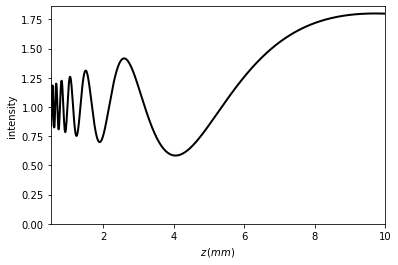

In [8]:
u2.draw(z_scale='mm')


### to field_X

In [9]:
xout = np.linspace(-size, size, 256)
z = 2 * mm


In [10]:
%%time
u2 = u1.CZT(z, xout)


CPU times: user 12.9 ms, sys: 194 µs, total: 13.1 ms
Wall time: 11.6 ms


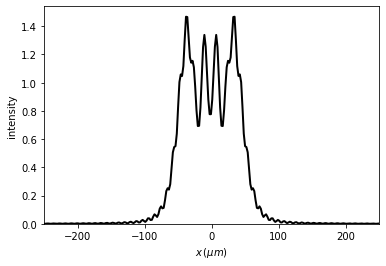

In [11]:
u2.draw()


### to field_XZ

In [12]:
xout = np.linspace(-size / 2, size / 2, 2048)
z = np.linspace(1 * mm, 15 * mm, 128)


In [13]:
%%time
u2 = u1.CZT(z, xout, verbose=True)


CPU times: user 988 ms, sys: 11.4 ms, total: 999 ms
Wall time: 996 ms


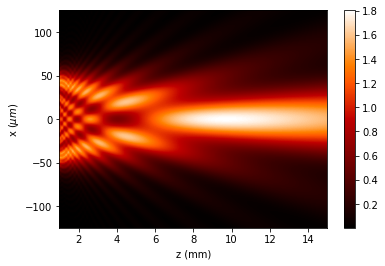

In [14]:
u2.draw(logarithm=0, z_scale='mm')
plt.colorbar()


## XY Scheme

In [15]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_fields_Z import Scalar_field_Z
from diffractio.scalar_fields_X import Scalar_field_X


In [16]:
size = 75
xin = np.linspace(-size, size, 512)
yin = np.linspace(-size, size, 512)
wavelength = 550 * nm


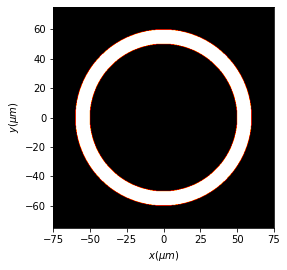

In [17]:
t0 = Scalar_mask_XY(xin, yin, wavelength)
t0.ring(r0=(0 * um, 0 * um), radius1=50 * um, radius2=60 * um)

u0 = Scalar_source_XY(xin, yin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0
u1.draw()


### to data

In [18]:
xout = 0
yout = 0.
z = .5 * mm


In [19]:
%%time
u2 = u1.CZT(z, xout, yout)
print("{}".format(np.abs(u2)**2))


0.005578354037388983
CPU times: user 93 ms, sys: 12.2 ms, total: 105 ms
Wall time: 103 ms


### to field_X

In [20]:
xout = np.linspace(-size, size, 512)
yout = 0.
z = .5 * mm


CPU times: user 145 ms, sys: 8.04 ms, total: 153 ms
Wall time: 151 ms


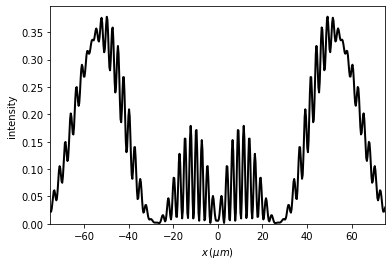

In [21]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()


### to field_XY


In [22]:
xout = np.linspace(-size, size, 256)
yout = np.linspace(-size, size, 256)
z = .25 * mm


CPU times: user 327 ms, sys: 135 ms, total: 463 ms
Wall time: 247 ms


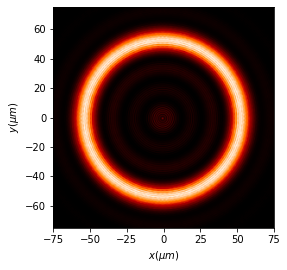

In [23]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()


### to field_Z

The Z field is computed with a for loop, thus it is a bit slower.

In [24]:
xout = -1.
yout = 0.
z = np.linspace(0.25 * mm, 1 * mm, 64)


num x, num y, num z = 1, 1, 64
CPU times: user 4.49 s, sys: 19.4 ms, total: 4.51 s
Wall time: 4.49 s


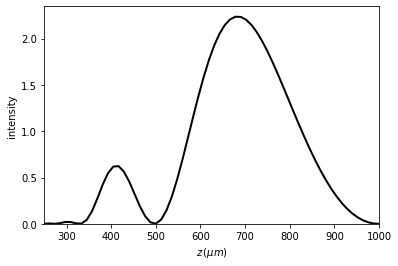

In [25]:
%%time
u2 = u1.CZT(z, xout, yout, verbose=True)
u2.draw()


### to field_XZ

In [26]:
xout = np.linspace(-size, size, 128)
yout = 0.
z = np.linspace(0.25 * mm, 1 * mm, 128)


num x, num y, num z = 128, 1, 128
CPU times: user 9.62 s, sys: 642 ms, total: 10.3 s
Wall time: 10.2 s


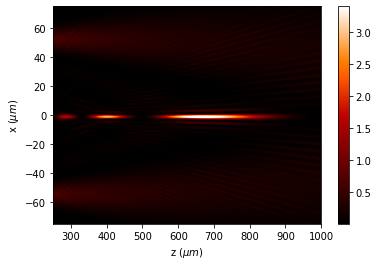

In [27]:
%%time
u2 = u1.CZT(z, xout, yout, verbose=True)
u2.draw()
plt.colorbar()


### to field_XYZ

In [28]:
xout = np.linspace(-size, size, 128)
yout = np.linspace(-size, size, 128)
z = np.linspace(0.25 * mm, 6 * mm, 64)


In [29]:
%%time
u2 = u1.CZT(z, xout, yout, verbose=True)


num x, num y, num z = 128, 128, 64
CPU times: user 4.97 s, sys: 391 ms, total: 5.36 s
Wall time: 5.34 s


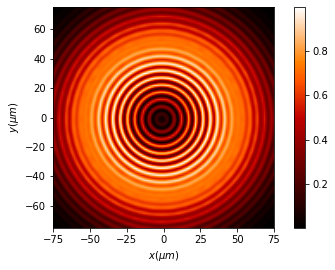

In [30]:
u2.draw_XY(z0=1 * mm)
plt.colorbar()


<Figure size 432x288 with 0 Axes>

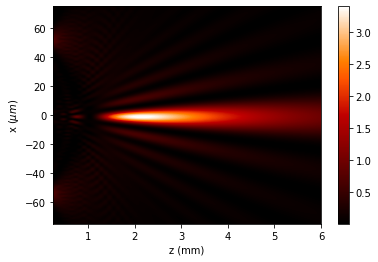

In [31]:
u2.draw_XZ(y0=0, logarithm=0, z_scale='mm')
plt.colorbar()


## CZT for reducing the output size

Chirped z-Transform algorithm is specially indicated for cases where the output field is much smaller than the input field, as you can choose the position and sampling of the field. An important example for this is the focusing of a lens.

### X scheme

In [32]:
size = 3 * mm
xin = np.linspace(-size, size, 4096)
wavelength = 550 * nm
focal = 250 * mm


In [33]:
%load_ext autoreload
%autoreload 2

In [34]:
t0 = Scalar_mask_X(xin, wavelength)
t0.lens(x0=0, focal=focal)

u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0


In [35]:
xout = 0.
z = np.linspace(focal - 30 * mm, focal + 30 * mm, 128)


CPU times: user 440 ms, sys: 8.57 ms, total: 449 ms
Wall time: 446 ms


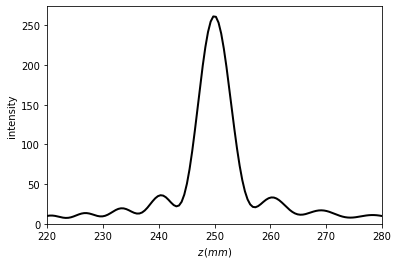

In [36]:
%%time
u2 = u1.CZT(z, xout, verbose=True)
u2.draw(z_scale='mm')


In [37]:
xout = np.linspace(-150 * um, 150 * um, 256)
z = focal


CPU times: user 41.7 ms, sys: 0 ns, total: 41.7 ms
Wall time: 40.6 ms


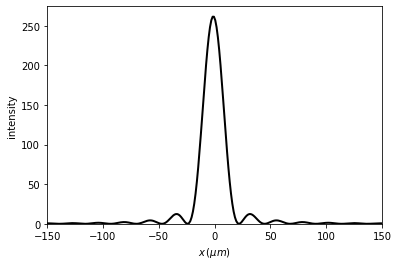

In [38]:
%%time
u2 = u1.CZT(focal, xout)
u2.draw()


In [39]:
xout = np.linspace(-150 * um, 150 * um, 128)
z = np.linspace(focal - 20 * mm, focal + 20 * mm, 128)


CPU times: user 993 ms, sys: 757 µs, total: 994 ms
Wall time: 990 ms


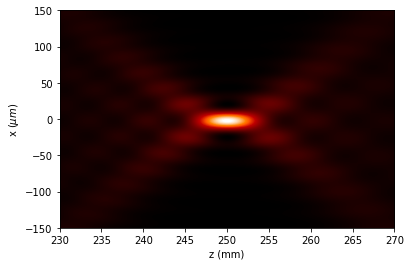

In [40]:
%%time
u2 = u1.CZT(z, xout, verbose=True)
u2.draw(logarithm=0, z_scale='mm')


### XY scheme

In [41]:
size = 2 * mm
xin = np.linspace(-size, size, 512)
yin = np.linspace(-size, size, 512)
wavelength = 550 * nm
focal = 500 * mm


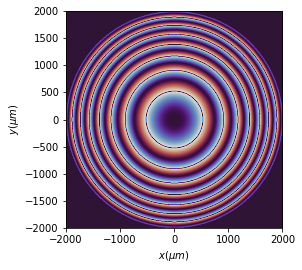

In [42]:
t0 = Scalar_mask_XY(xin, yin, wavelength)
t0.lens(r0=(0, 0), focal=focal, radius=0)
t0.pupil()

u0 = Scalar_source_XY(xin, yin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0
u1.draw('phase')


In [43]:
xout = np.linspace(-150 * um, 150 * um, 128)
yout = np.linspace(-150 * um, 150 * um, 128)
z = focal


num x, num y, num z = 128, 128, 1
CPU times: user 320 ms, sys: 168 ms, total: 487 ms
Wall time: 232 ms


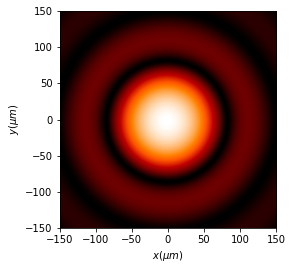

In [44]:
%%time
u2 = u1.CZT(z, xout, yout, verbose=True)
u2.draw(logarithm=1e-1)
